<a href="https://colab.research.google.com/github/jenishmonpara/AssistantAnalyst/blob/main/ARIMA_Stock_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 52.7 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance as yf
from datetime import date,datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import seaborn as sns
from tqdm import tqdm
import pandas as pd
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
import warnings

#in practice do not supress these warnings, they carry important information about the status of your model
warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore', category=HessianInversionWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read Data

In [3]:
tickerSymbol = 'TATAMOTORS.NS'
data = yf.Ticker(tickerSymbol)

In [4]:
prices = data.history(start=(date.today() - timedelta(days=120)), end=date.today()).Close
returns = prices.pct_change().dropna() 
returnsdiff = returns.diff(periods = 1).dropna()    # creating first difference in returns

Text(0, 0.5, 'Prices')

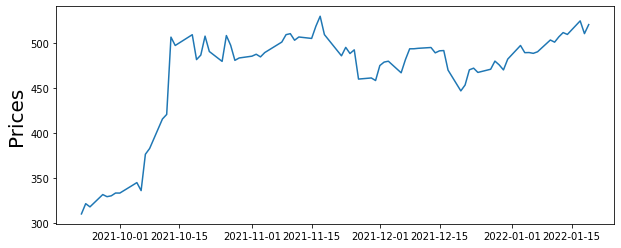

In [5]:
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Prices', fontsize=20)

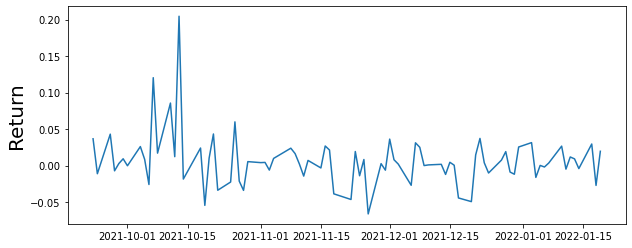

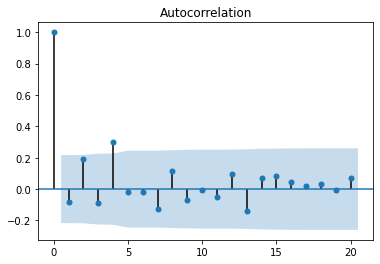

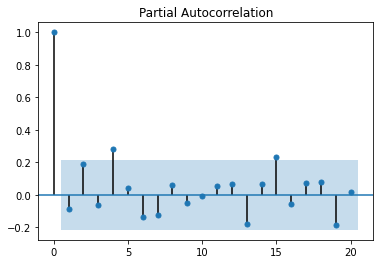

In [6]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Return', fontsize=20)

plot_acf(returns)
plt.show()

plot_pacf(returns)
plt.show()

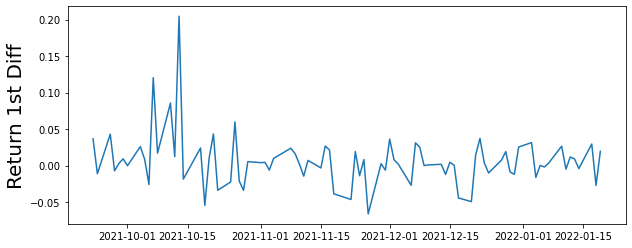

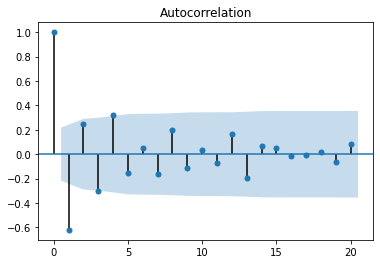

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


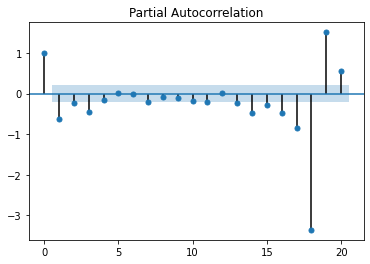

In [7]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Return 1st Diff', fontsize=20)

plot_acf(returnsdiff)
plt.show()

plot_pacf(returnsdiff)
plt.show()

# D = 0

# Try ARIMA(4,0,4) Model



In [8]:
model = ARIMA(returns, order = (4,0,4)).fit()
print(model.summary())


                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                   82
Model:                     ARMA(4, 4)   Log Likelihood                 163.707
Method:                       css-mle   S.D. of innovations              0.032
Date:                Thu, 20 Jan 2022   AIC                           -307.415
Time:                        05:28:37   BIC                           -283.347
Sample:                             0   HQIC                          -297.752
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0072      0.004      1.622      0.109      -0.002       0.016
ar.L1.Close     0.0614      0.374      0.164      0.870      -0.671       0.794
ar.L2.Close    -0.2081      0.241     -0.864    

In [9]:
#get forecast
future = 5
last = prices[-1]

# values of first array are the forecast
forecast = model.forecast(steps = future)
for i in range(0,future):
    last = last * (1 + forecast[0][i])
    print("Price predicted at day {} : {} ".format(i + 1,last))


Price predicted at day 1 : 516.1702050721995 
Price predicted at day 2 : 530.762268169813 
Price predicted at day 3 : 536.3382197807036 
Price predicted at day 4 : 546.0643470782281 
Price predicted at day 5 : 544.9812495972564 


# D = 1

# Try ARIMA(4,0,4) Model


In [12]:
model = ARIMA(returns, order = (3,1,3)).fit()
print(model.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                   81
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 156.702
Method:                       css-mle   S.D. of innovations              0.034
Date:                Thu, 20 Jan 2022   AIC                           -297.404
Time:                        05:29:05   BIC                           -278.249
Sample:                             1   HQIC                          -289.719
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0003      0.000     -1.718      0.090      -0.001    3.73e-05
ar.L1.D.Close    -0.9484      0.633     -1.497      0.139      -2.190       0.293
ar.L2.D.Close    -0.3444      0.451     

In [13]:
#get forecast
future = 5
# print(model.forecast(steps = future))

lastprice = prices[-1]
lastreturn =returns[-1]
# values of first array are the forecast
forecast = model.forecast(steps = future)
for i in range(0,future):
    returni = lastreturn - forecast[0][i]
    pricei = lastprice * (1 + returni)
    lastprice=pricei
    lastreturn=returni

    print("Value at day {} : {} . So Price predicted is {} ".format(i + 1,forecast[0][i],pricei))



Value at day 1 : -0.015489898498970131 . So Price predicted is 539.1656101050522 
Value at day 2 : 0.007006287670869745 . So Price predicted is 554.3477626158146 
Value at day 3 : -0.014204455651795386 . So Price predicted is 577.8316316019493 
Value at day 4 : 0.0008438885763781632 . So Price predicted is 601.8227236877443 
Value at day 5 : -0.008873550691566534 . So Price predicted is 632.1502105475502 
